In [721]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [808]:
# Figure 6-A Pie chart (cell origins)

# EDA excel file is attached 
df = pd.read_excel(r"C:\Users\Mhaha\OneDrive\Desktop\EDA.xlsx", sheet_name='raw')

wdf_1 = df.iloc[1:, ].loc[:, ['Origin']] # wdf refers to working dataframe

# Extract the leading terms (e.g., "Animal", "Human", etc.) and Counting
wdf_1['Main_Term'] = wdf_1['Origin'].str.extract(r"^(\w+)")
wdf_1['Main_Term'].value_counts()

# the pie chart was made in the same Excel file (Pie charts sheet) using the data below


Main_Term
Animal     83
Human       8
Unclear     3
In          3
Both        1
Name: count, dtype: int64

In [809]:
# Figure 6-B Clustered vertical bars (Cell types and frequencies)

wdf_2 = df.iloc[1:,].iloc[:,[5]]

# Function to safely split and extract categories and details
def extract_category(cell_type):
    if isinstance(cell_type, str):
        return cell_type.split(' (')[0]
    return None  

def extract_details(cell_type):
    if isinstance(cell_type, str):
        # Extracting details inside parentheses, if any
        return pd.Series(cell_type).str.extract(r'\((.*?)\)').iloc[0, 0]
    return None

# Applying the functions to extract the category and details
wdf_2['Category'] = wdf_2['Cell_type'].apply(extract_category)
wdf_2['Details'] = wdf_2['Cell_type'].apply(extract_details)

# Pivoting the data to create columns for each category
pivoted_df = wdf_2.pivot(columns='Category', values='Details')

# Mergeing the new columns back with the original DataFrame
final_df = pd.DataFrame(pd.concat([wdf_2, pivoted_df], axis=1))
final_df

,Cell_type,Category,Details,NaN,Cell line,In vivo analysis,Other,Progenitor cells,Stem cells,Stem cells
1,Stem cells,Stem cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Progenitor cells (NPCs),Progenitor cells,NPCs,NaN,NaN,NaN,NaN,NPCs,NaN,NaN
3,Stem cells,Stem cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cell line,Cell line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stem cells (NSCs),Stem cells,NSCs,NaN,NaN,NaN,NaN,NaN,NSCs,NaN
...,...,...,...,...,...,...,...,...,...,...
95,Cell line,Cell line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Stem cells (MSCs),Stem cells,MSCs,NaN,NaN,NaN,NaN,NaN,MSCs,NaN
97,Cell line,Cell line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Cell line,Cell line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [810]:
#Figure 6-B (continued)

#Rearrenging the columns
f_df = df.iloc[1:,].loc[:,['Cell_line']]
f_df_1 = final_df.iloc[:,6:9]
final_cell = pd.concat([f_df_1,f_df])

# Cleaning 
final_cell.columns = ['Other','Progenitor_cells','Stem_cells','Cell_line']
final_cell.Stem_cells = np.where(final_cell.Stem_cells ==  'BM-MSCs', 'MSCs',final_cell.Stem_cells )
final_cell.Stem_cells = np.where(final_cell.Stem_cells ==  'BMSCs', 'MSCs',final_cell.Stem_cells )
final_cell.Progenitor_cells = np.where(final_cell.Progenitor_cells ==  'IPSCs-derived neural spheroids', 'Neural spheroids',final_cell.Progenitor_cells )
final_cell.Other = np.where(final_cell.Other ==  'Organotypic\n(SC)', 'Organotypic (SC)',final_cell.Other )
final_cell.Other = np.where(final_cell.Other ==  'primary cells- Schwann cells', 'Schwann cells',final_cell.Other )

#Exporting to create visualization via R (refer to R code)
final_cell.to_csv('final_cell.csv')
final_cell

,Other,Progenitor_cells,Stem_cells,Cell_line
1,NaN,NaN,NaN,NaN
2,NaN,NPCs,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NSCs,NaN
...,...,...,...,...
95,NaN,NaN,NaN,PC12
96,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,SH-SY5Y
98,NaN,NaN,NaN,SH-SY5Y


In [811]:
# Figure 6-C (Distribution of Studies by Exact Cell density and Unit)

# cleaning cell density unit data 
wdf_3 = df.iloc[1:,].loc[:,['Cell_density_unit']]
wdf_3 = wdf_3.dropna().reset_index().drop(columns = 'index')
wdf_3.Cell_density_unit =wdf_3.Cell_density_unit.str.title()
wdf_3.Cell_density_unit= np.where(wdf_3.Cell_density_unit ==  'Cell/Ml', 'Cells/Ml',wdf_3.Cell_density_unit )
wdf_3.Cell_density_unit= np.where(wdf_3.Cell_density_unit ==  'Ml', 'Cells/Ml',wdf_3.Cell_density_unit )
wdf_3.Cell_density_unit= np.where(wdf_3.Cell_density_unit ==  'Cell/Well', 'Cells/Well',wdf_3.Cell_density_unit )

# cleaning cell density value data
wdf_4 =df.iloc[1:,].loc[:,['Cell_denisty']]
wdf_4.Cell_denisty = wdf_4.Cell_denisty.astype(float)
wdf_4 = wdf_4.dropna().reset_index().drop(columns='index')

# Merging the two data
density_df = pd.concat([wdf_3,wdf_4],axis=1)

# Formatting cell density values to scientific notation

def format_density_density(value):  
    """Convert a numerical value to the format 's x 10^n'."""  
    if value == 0:  
        return "0"  
    else:  
        exponent = int(np.floor(np.log10(value)))   
        coefficient = value / (10 ** exponent)       
        if coefficient >= 10:  
            coefficient /= 10  
            exponent += 1  
        return f"{coefficient:.1f} x 10^{exponent}"  

# Apply the function to create a new column 'Formatted_Density'  
density_df['Formatted_Density'] = density_df['Cell_denisty'].apply(format_density_density)  

# creating the final df 
density_df = pd.DataFrame(density_df[['Cell_density_unit', 'Cell_denisty', 'Formatted_Density']])
density_df = density_df[density_df.Cell_density_unit != 'Cells/Disc']
density_df = density_df[density_df.Cell_density_unit != 'Cells/Cm2']
density_df

,Cell_density_unit,Cell_denisty,Formatted_Density
0,Cells/Well,1000000.0,1.0 x 10^6
1,Cells/Well,10000000.0,1.0 x 10^7
3,Cells/Well,10000.0,1.0 x 10^4
4,Cells/Hydrogel,10000.0,1.0 x 10^4
5,Cells/Ml,1000000.0,1.0 x 10^6
...,...,...,...
64,Cells/Hydrogel,200000.0,2.0 x 10^5
65,Cells/Ml,10000000.0,1.0 x 10^7
66,Cells/Hydrogel,200000.0,2.0 x 10^5
67,Cells/Hydrogel,5000000.0,5.0 x 10^6


C:\Users\Mhaha\AppData\Local\Temp\ipykernel_26048\314692049.py:40: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Mhaha\AppData\Local\Temp\ipykernel_26048\314692049.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



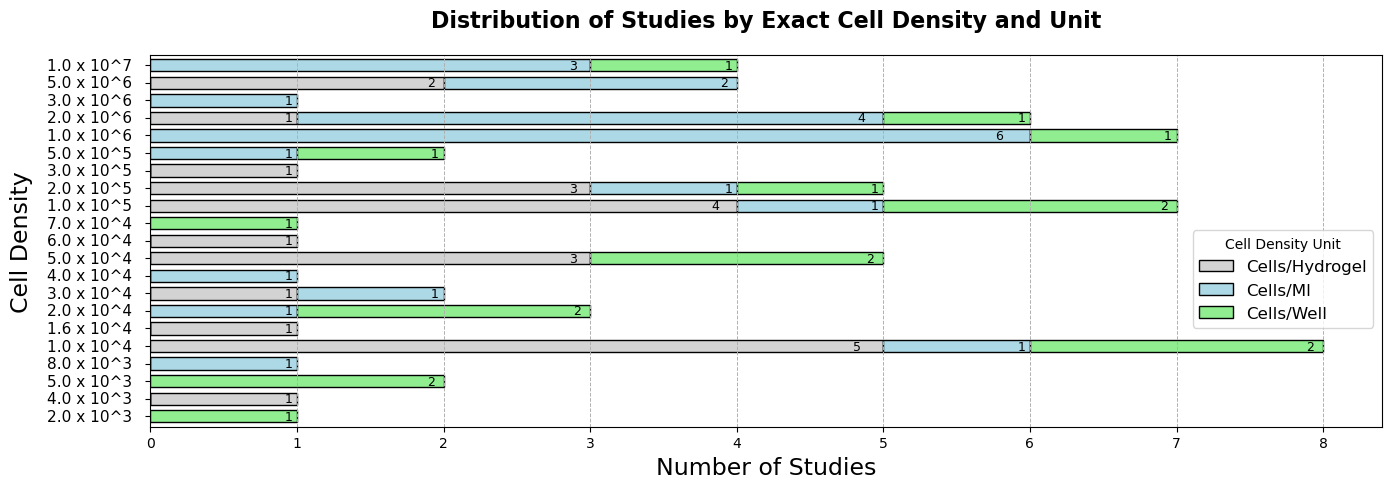

In [812]:
# Figure 6-C (Continued: Graphing)
grouped = density_df.groupby(['Formatted_Density', 'Cell_density_unit']).size().unstack(fill_value=0)  

# Extracting numeric value for sorting y-axis
def extract_numeric_value(formatted_value):  
    """Extracts a numerical value from the formatted density string."""  
    if formatted_value == "0":  
        return 0  
    coefficient, exponent = formatted_value.split(' x 10^')  
    return float(coefficient) * (10 ** int(exponent))  

# applying the function to sort the values 
grouped['Numeric_Value'] = grouped.index.map(extract_numeric_value)  
grouped = grouped.sort_values(by='Numeric_Value')  
grouped = grouped.drop(columns='Numeric_Value')  

# plotting horizontal stacked bar chart with specified dimensions  
colors = ['lightgrey', 'lightblue', 'lightgreen']  
ax = grouped.plot(kind='barh', stacked=True, color=colors, edgecolor='black', figsize=(14, 5), width=0.7)  # Set figure size here  

# Adding labels,title, and legend
plt.xlabel('Number of Studies', fontsize=17)  
plt.ylabel('Cell Density', fontsize=17,labelpad=10)  
plt.title('Distribution of Studies by Exact Cell Density and Unit', fontsize=16, pad=20,fontweight='bold')  
plt.yticks(fontsize=11, va='center', rotation=0, ha='right')
plt.xticks(size=10)
plt.subplots_adjust(left=0.2)  
plt.legend(title='Cell Density Unit', loc='upper right', fontsize=12, bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.grid(axis='x', linestyle='--', linewidth=0.7)  

# adjusting the y-tick labels position
for label in ax.get_yticklabels():  
    label.set_x(label.get_position()[0] - 0.007)  
    
# Annotating counts inside the bars 
for i in range(grouped.shape[0]):  
    cumulative_sum = grouped.iloc[i].cumsum()  
    counts = grouped.iloc[i]  
    for j in range(len(counts)):  
        if counts[j] > 0:    
            ax.text(cumulative_sum[j] - counts[j] * 0.03, i, str(counts[j]),  
                    ha='right', va='center', fontsize=9, color='black')  
            
#plt.savefig('filename1.png',bbox_inches='tight')  # Saving the file 
plt.tight_layout()
plt.show()

In [813]:
# Figure 6-D (Cell culture Mode, Duration, and seeding Unit)

# Cleaning the data for mode and duration of culture
wdf_5 = df.iloc[1:,].loc[:,['Mode','Culture_duration']]
wdf_5 =wdf_5.dropna().reset_index().drop(columns='index')
wdf_5 = wdf_5[wdf_5.Culture_duration !='Not reported']

# merging with the cell density unit data
wdf_6 = pd.concat([wdf_5,wdf_3],axis=1) 

#Exporting to create visualization via R (refer to R code)
wdf_6.to_csv('wdf_6.csv')

# Annotations were added using the counts obtained below
print(wdf_6.Mode.value_counts())
print('______________')
print(wdf_6.Culture_duration.value_counts())
print('______________')
print(wdf_6.Cell_density_unit.value_counts())

wdf_6

Mode
Mono-culture    87
Co-culture       4
Name: count, dtype: int64
______________
Culture_duration
3d-2w    76
2w-3m    10
<3d       5
Name: count, dtype: int64
______________
Cell_density_unit
Cells/Ml          24
Cells/Hydrogel    23
Cells/Well        17
Cells/Cm2          4
Cells/Disc         1
Name: count, dtype: int64


,Mode,Culture_duration,Cell_density_unit
0,Mono-culture,3d-2w,Cells/Well
1,Mono-culture,2w-3m,Cells/Well
2,Co-culture,3d-2w,Cells/Disc
3,Mono-culture,3d-2w,Cells/Well
4,Mono-culture,2w-3m,Cells/Hydrogel
...,...,...,...
88,Mono-culture,3d-2w,NaN
89,Mono-culture,3d-2w,NaN
90,Mono-culture,2w-3m,NaN
91,Mono-culture,2w-3m,NaN


In [726]:
# Fig 7-A Pie chart (Counts below ere used to make the core/ refer to Pie charts sheet in EDA)
wdf_7 = df.iloc[1:,].loc[:,['Hydrogel_origion']]
print(wdf_7.dropna().value_counts())
print('___________________')

wdf_8 = df.iloc[1:,].loc[:,['Natural_type']]
wdf_8 = wdf_8.dropna()
wdf_8.Natural_type = np.where(wdf_8.Natural_type =='protein-based','Protein-based' ,wdf_8.Natural_type)
wdf_8.Natural_type.value_counts()

Hydrogel_origion         
Natural                      76
Synthetic                    12
Mixed (Natural,Synthetic)     9
Mixed                         1
Name: count, dtype: int64
___________________


Natural_type
Polysaccharide-based                           52
Protein-based                                  12
Mixed(Protein-based, Polysaccharide-based)     10
Mixed(ECM-based, Polysaccharide-based)          1
Mixed                                           1
Name: count, dtype: int64

In [836]:
# Fig 7-A Pie chart (percentages below are used to make the periphery of Polysccharide-based/ refer to Pie charts sheet in EDA)

# Subseting the data containing only Polysaccharides
wdf_9 = df.iloc[1:,].loc[:,['Natural_type','Polysaccharide_type','Mixed_hydrogel_type']]
wdf_9 = wdf_9[wdf_9['Natural_type'] =='Polysaccharide-based']

# Separating multiple Polysaccharides reported with a "comma" between them and stacking all the indiviual types
wdf_9_sep= wdf_9['Mixed_hydrogel_type'].str.split(',', expand=True)
wdf_9_stacked = pd.DataFrame(pd.concat([wdf_9.iloc[:,1],wdf_9_sep.loc[:,0],wdf_9_sep.loc[:,1]], axis=0))
wdf_9_stacked = wdf_9_stacked.reset_index().rename({0:'Polysac_name'}, axis=1).drop(columns='index').dropna()

# Cleaning and Calculating the count of occurance
wdf_9_stacked.Polysac_name = wdf_9_stacked.Polysac_name.str.strip().str.title() 
wdf_9_stacked.value_counts() 

Polysac_name    
Gelatin             28
Chitosan            12
Alginate            10
Ha                   7
Cellulose            2
Agarose              1
Chitin               1
Gellan Gum           1
Other (Pullulan)     1
Xanthan Gum          1
Name: count, dtype: int64

In [833]:
# Fig 7-A Pie chart (percentages below are used to make the periphery of Protein-based/ refer to Pie charts sheet in EDA)

# Subseting the data contianing only Proteins
wdf_10 = df.iloc[1:,].loc[:,['Natural_type','Protein_type','Mixed_hydrogel_type']]
wdf_10 = wdf_10[wdf_10['Natural_type'] =='Protein-based']

# Separating multiple Proteins reported with a "comma" between them and stacking all the indiviual types
wdf_10_sep= wdf_10['Mixed_hydrogel_type'].str.split(',', expand=True)
wdf_10_stacked = pd.DataFrame(pd.concat([wdf_10.iloc[:,1],wdf_10_sep.loc[:,0],wdf_10_sep.loc[:,1]], axis=0))
wdf_10_stacked = wdf_10_stacked.reset_index().rename({0:'Protein_name'}, axis=1).drop(columns='index').dropna()

# Cleaning and Calculating the count of occurance
wdf_10_stacked.Protein_name = wdf_10_stacked.Protein_name.str.strip().str.title() 
wdf_10_stacked.value_counts() 

Protein_name
Silk            7
Collagen        5
Fibrin          1
Name: count, dtype: int64

In [837]:
# Fig 7-A Pie chart (percentages below are used to make the periphery of Mixed/ refer to Pie charts sheet in EDA)
wdf_11 = df.iloc[1:,].loc[:,['Mixed_hydrogel_type']]

# Cleaning and sorting alphabetically
wdf_11.Mixed_hydrogel_type = wdf_11.Mixed_hydrogel_type.str.replace(r'\s+', '', regex=True).str.title()
def sort_comma_separated_values(value):
    if pd.isna(value):  # Check if the value is NaN
        return value
    return ','.join(sorted(value.split(',')))

# Applying the function and calculating count of occurance 
wdf_11['Sorted_Mixed_hydrogel_type'] = wdf_11['Mixed_hydrogel_type'].apply(sort_comma_separated_values)
wdf_11.Sorted_Mixed_hydrogel_type.value_counts() 

Sorted_Mixed_hydrogel_type
Chitosan,Gelatin           5
Collagen,Ha                5
Alginate,Gelatin           3
Collagen,Gelatin           2
Chitosan,Polyurethane      2
Gelatin,Ha                 2
Chitosan,Silk              1
Agarose,Gelatin            1
Fibrinogen,Peo             1
Chitosan,Ha                1
Chitosan,Paam              1
Ha,Paam                    1
Matrigel                   1
Ecm(Spinalcord),Gelatin    1
Gelatin,Gellangum,Peg      1
Alginate,Collagen          1
Peg,Silk                   1
Aam,Gelma,Nipam            1
Cellulose,Chitosan         1
Alginate,Cellulose         1
Collagen,Silk              1
Peg,Polyurethane           1
Alginate,Ha,Poloxamer      1
Gelatin,Silk               1
Pcl,Silk                   1
Name: count, dtype: int64

In [707]:
# Fig 7-B1 (Nanomaterial type and Frequencies)

# Data is manually cleaned in 'Clean' sheet of EDA excel file
df_1 = pd.read_excel(r"C:\Users\Mhaha\OneDrive\Desktop\EDA.xlsx", sheet_name='Clean')
wdf_12 = df_1.iloc[1:,].loc[:,['Carbon_type', 'Metal_type', 'Ceramic_type', 'Polymer_type', 'Semiconductor_type']]

# More cleaning
wdf_12.Polymer_type= np.where(wdf_12.Polymer_type == 'Polythiophene', 'PTh',wdf_12.Polymer_type)
wdf_12.Ceramic_type= np.where(wdf_12.Ceramic_type== 'Bismuth errite', 'BiFeO3',wdf_12.Ceramic_type)
wdf_12.Ceramic_type= np.where(wdf_12.Ceramic_type== 'Cobalt ferrite', 'CoFe2O4',wdf_12.Ceramic_type)
wdf_12.Ceramic_type= np.where(wdf_12.Ceramic_type== 'Barium Titanate', 'BaTiO3',wdf_12.Ceramic_type)

# Exporting for graphing in R (refer to R code)
wdf_12.to_csv("wdf_12.csv")
wdf_12

,Carbon_type,Metal_type,Ceramic_type,Polymer_type,Semiconductor_type
1,NaN,NaN,NaN,NaN,BP
2,CNT,NaN,NaN,NaN,NaN
3,CNT,NaN,NaN,NaN,NaN
4,Graphene,NaN,BaTiO3,NaN,NaN
5,CNT,NaN,NaN,NaN,NaN
...,...,...,...,...,...
96,CNT,NaN,NaN,NaN,NaN
97,GO,NaN,BiFeO3,NaN,NaN
98,NaN,NaN,CoFe2O4,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN


In [709]:
# Fig 7-B2 (Nanomaterial Type Distribution)

#Data is manually cleaned in 'Clean' sheet of EDA excel file
df_1 = pd.read_excel(r"C:\Users\Mhaha\OneDrive\Desktop\EDA.xlsx", sheet_name='Clean')
wdf_13 = df_1.iloc[1:,].loc[:,['Nanomaterial_type']]
wdf_13 = wdf_13.dropna(subset='Nanomaterial_type')
wdf_13.Nanomaterial_type =wdf_13.Nanomaterial_type.str.title().str.strip()

# More cleaning
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type == 'Mixed (Ceramic-Based,Metal-Based)','Mixed (Metal-Based, Ceramic-Based)',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type == 'Mixed(Carbon-Based, Semiconductor-Based)', 'Mixed (Carbon-Based, Semiconductor-Based)',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type =='Mixed ','Mixed',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type == 'Carbon-Based','Carbon',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type == 'Ceramic-Based','Ceramic',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type ==  'Polymer-Based','Polymer',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type ==  'Metal-Based','Metal',wdf_13.Nanomaterial_type)
wdf_13.Nanomaterial_type = np.where(wdf_13.Nanomaterial_type ==  'Semiconductor-Based','Semiconductor',wdf_13.Nanomaterial_type)

# Exporting for graphing in R (refer to R code)
wdf_13.to_csv("wdf_13.csv")
wdf_13

,Nanomaterial_type
1,Semiconductor
2,Carbon
3,Carbon
4,Ceramic
5,Carbon
...,...
94,Metal
95,Mixed
96,Carbon
97,Carbon


In [804]:
# Fig 7-C1 (Snakey graph at top: cleaning)
wdf = df.iloc[1:,].loc[:,['Hydrogel_origion',"Natural_type","Crosslinking_type"]].dropna(subset="Crosslinking_type")

# cleaning the Crosslinking_type column 
wdf.Crosslinking_type = wdf.Crosslinking_type.str.title()
wdf.Crosslinking_type = np.where(wdf.Crosslinking_type == 'covalent', 'Covalent',wdf.Crosslinking_type)
wdf.Crosslinking_type = np.where(wdf.Crosslinking_type == 'Physical ', 'Physical',wdf.Crosslinking_type)
wdf = wdf[wdf.Crosslinking_type.isin(['Covalent','Ionic','Photopolymerization','3D Bioprinting','Physical','Self-Assembly'])]

# cleaning the Natural_type column 
wdf.Natural_type = wdf.Natural_type.str.title()
df = wdf[~wdf.Natural_type.isin(['Mixed(Protein-Based, Polysaccharide-Based) ', 'Mixed(Ecm-Based, Polysaccharide-Based) ','Mixed' ])]

# cleaning the Hydrogel_origion column 
wdf.Hydrogel_origion = wdf.Hydrogel_origion.str.title()
wdf = wdf[~wdf.Natural_type.isin(['Natural', 'Mixed', ])]
wdf.Hydrogel_origion = np.where(wdf.Hydrogel_origion =='Natural', np.nan, wdf.Hydrogel_origion)
wdf = wdf.reset_index().drop(columns='index')
wdf.sample(10)

# merging the first two columns
wdf['Merged_Column'] = wdf['Hydrogel_origion'].fillna(wdf['Natural_type'])
wdf = wdf.loc[:,["Merged_Column", 'Crosslinking_type']]
wdf.sample(10)

,Merged_Column,Crosslinking_type
44,Protein-Based,Covalent
21,Polysaccharide-Based,Covalent
32,Polysaccharide-Based,Covalent
24,Polysaccharide-Based,Photopolymerization
29,Polysaccharide-Based,Covalent
9,Polysaccharide-Based,Photopolymerization
3,Polysaccharide-Based,Photopolymerization
6,Synthetic,Photopolymerization
18,Polysaccharide-Based,Photopolymerization
2,Polysaccharide-Based,Covalent


In [805]:
# Prepareing the data
source_labels = wdf.iloc[:, 0].unique().tolist() 
target_labels = wdf.iloc[:, 1].unique().tolist()  
all_labels = source_labels + target_labels

# Creating a mapping from label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}
wdf.loc[:, 'source_index'] = wdf.iloc[:, 0].map(label_to_index)
wdf.loc[:, 'target_index'] = wdf.iloc[:, 1].map(label_to_index)

# Creating the Sankey diagram 
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels
    ),
    link=dict(
        source=wdf['source_index'],  
        target=wdf['target_index'],  
        value=[1] * len(wdf)  
    )
)])


fig.update_layout(

    font=dict(
        size=21,
        color="black",
        family="Arial"  
    ),
    width=600,
    height=600,
    margin=dict(l=10, r=10, t=10, b=10)
)


fig.write_image("sankey_diagram.png", width=500 ,height=500)

fig.show()


In [261]:
# Fig 7-C2 (Snakey graph at bottom: cleaning)
wdf_14 =df.iloc[1:,].loc[0:,['Hydrogel_geometry','Tissue_modeled']]
wdf_14 = wdf_14.dropna()
wdf_14.Hydrogel_geometry = wdf_14.Hydrogel_geometry.str.title()
wdf_14 = wdf_14[wdf_14.Hydrogel_geometry.isin(['General 3D Structure','Conduit','Injectable','Film/Sheet'])]

# Cleaning
wdf_14.Tissue_modeled = wdf_14.Tissue_modeled.str.upper()
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'CNS (SCI)', 'CNS(SCI)',wdf_14.Tissue_modeled)
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'CNS (SCI)', 'CNS(SCI)',wdf_14.Tissue_modeled)
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'CSN (SCI)', 'CNS (SCI)',wdf_14.Tissue_modeled)
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'CSN (SCI)', 'CNS (SCI)',wdf_14.Tissue_modeled)
wdf_14 = wdf_14[wdf_14.Tissue_modeled !=  '·\xa0\xa0\xa0\xa0\xa0\xa0\xa0 UNCLEAR']
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'CNS(SCI)', 'CNS (SCI)',wdf_14.Tissue_modeled)
wdf_14 = wdf_14[wdf_14.Tissue_modeled != 'CNS']
wdf_14 = wdf_14[wdf_14.Tissue_modeled != 'PNS ( NEUROGENESIS IN MUSCULATURE)']
wdf_14 = wdf_14[wdf_14.Tissue_modeled != 'PNS']
wdf_14 = wdf_14[wdf_14.Tissue_modeled != 'OTHER(BIOINTERFACE)']
wdf_14 = wdf_14[wdf_14.Tissue_modeled != ' UNCLEAR']
wdf_14.Tissue_modeled = np.where(wdf_14.Tissue_modeled == 'OTHER (GENERAL DIFFERENTIATION)', 'GENERAL DIFFERENTIATION',wdf_14.Tissue_modeled)
wdf_14

,Hydrogel_geometry,Tissue_modeled
1,General 3D Structure,CNS (SCI)
3,Conduit,GENERAL DIFFERENTIATION
4,Conduit,PNS (SCIATIC NERVE)
5,General 3D Structure,GENERAL DIFFERENTIATION
6,General 3D Structure,CNS (SCI)
...,...,...
94,Conduit,PNS (SCIATIC NERVE)
95,General 3D Structure,CNS (SCI)
96,Injectable,CNS (BRAIN)
97,General 3D Structure,GENERAL DIFFERENTIATION


In [801]:
# Fig 7-C2 (Snakey graph at bottom: graphing)


target_labels = wdf_14['Hydrogel_geometry'].unique().tolist()  
source_labels = wdf_14['Tissue_modeled'].unique().tolist()  

# Create a combined list of all unique labels
all_labels = source_labels + target_labels

# Create a mapping from label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Map source and target columns to index values
wdf_14['source_index'] = wdf_14['Tissue_modeled'].map(label_to_index)  
wdf_14['target_index'] = wdf_14['Hydrogel_geometry'].map(label_to_index) 

link_counts = wdf_14.groupby(['source_index', 'target_index']).size().reset_index(name='count')

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,  
    ),
    link=dict(
        source=link_counts['source_index'],  # Indices of the source nodes
        target=link_counts['target_index'],  # Indices of the target nodes
        value=link_counts['count']            # Use the counts for the connections
    )
)])

fig.update_layout(

    font=dict(
        size=17,
        color="black",
        family="Arial"  
    ),
    width=600,
    height=600,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.write_image("sankey_diagram_flipped.png", width=500, height=500, scale=2)  # Higher resolution

fig.show()


In [365]:
# Fig 7-D (Nanomaterials' Integration and Dimension)

# Subseting Column for nanotype dimensions
wdf_15_a = df_1.iloc[1:,].loc[:,['Nanomat_dimension']]

# Separate by commas and expand into separate rows
df_expanded = wdf_15_a['Nanomat_dimension'].str.split(',', expand=True).stack().reset_index(drop=True)
df_combined = pd.DataFrame(df_expanded, columns=['Nanomat_dimension'])
df_combined['Nanomat_dimension'] = df_combined['Nanomat_dimension'].str.strip()
df_combined = df_combined[df_combined.Nanomat_dimension != 'Unclear']

# Subseting Column for nanotype integration methods
wdf_15_b =df_1.iloc[1:,].loc[:,['Nano_Hyd_integration']]
wdf_15_b = wdf_15_b .reset_index().drop(columns='index').dropna()

#combining and cleaning final dataframe
wdf_15 = pd.concat([wdf_15_b,df_combined], axis=1)
wdf_15.Nano_Hyd_integration = np.where(wdf_15.Nano_Hyd_integration == 'Other ( placement after hydrogel synthesis)','Other',wdf_15.Nano_Hyd_integration)
wdf_15.Nano_Hyd_integration = np.where(wdf_15.Nano_Hyd_integration == 'Other (layered)','Other',wdf_15.Nano_Hyd_integration)
wdf_15.Nano_Hyd_integration = np.where(wdf_15.Nano_Hyd_integration == 'Other ','Other',wdf_15.Nano_Hyd_integration)

# Exporting for graphing in R (refer to R code)
wdf_15.to_csv("wdf_15.csv")
wdf_15

# The counts below were used for annotaion
#wdf_15.Nanomat_dimension.value_counts()
#wdf_15.Nano_Hyd_integration.value_counts()

,Nano_Hyd_integration,Nanomat_dimension
0,OP1,2D
1,OP1,1D
2,OP1,2D
3,Other,1D
4,OP1,0D
...,...,...
103,NaN,0D
104,NaN,0D
105,NaN,1D
106,NaN,2D


In [371]:
# Fig 8-A1 (In Vitro Hydrogel Characterization Methods)

wdf_16 = df.iloc[1:,].loc[:,['In_vitro_hyd_assay']]

# Separate by commas and expand into separate rows
wdf_16_a = wdf_16['In_vitro_hyd_assay'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_16_b = pd.DataFrame(wdf_16_a, columns=['In_vitro_hyd_assay'])
wdf_16_b['In_vitro_hyd_assay'] = wdf_16_b['In_vitro_hyd_assay'].str.strip().str.title()

# Display the resulting DataFrame
wdf_16_b.In_vitro_hyd_assay.value_counts()

In_vitro_hyd_assay
Mechanical Test        62
Electrical Property    57
Rheological Test       49
Swelling Test          44
Degredation Test       31
Porosity               26
Biocompatibility        1
                        1
Name: count, dtype: int64

In [372]:
# Fig 8-A2 (In Vitro Cell Characterization Methods)
wdf_17 = df.iloc[1:,].loc[:,['In_vitro_cell_assay']]


# Split the 'In_vivo_asess_method' column by commas and expand into separate rows
wdf_17_a = wdf_17['In_vitro_cell_assay'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_17_b = pd.DataFrame(wdf_17_a, columns=['In_vitro_cell_assay'])
wdf_17_b['In_vitro_cell_assay'] = wdf_17_b['In_vitro_cell_assay'].str.strip().str.lower()

# Display the resulting DataFrame
wdf_17_b


,In_vitro_cell_assay
0,cell viability (l/d staining)
1,cell proliferation (cck8)
2,neural protein expression analysis
3,cell viability(l/d staining)
4,neural protein expression analysis
...,...
289,cell migraiton
290,neural protein expression analysis
291,neural gene expression analysis
292,cell viability(l/d staining - mtt)


In [374]:
# Fig 8-A2 (Continued)
cell_viability = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('cell viability', na=False)]
cell_proliferation = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('cell proliferation', na=False)]
protein_expression = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('protein expression', na=False)]
gene_expression = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('gene expression', na=False)]
cell_adhesion = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('cell adhesion', na=False)]
cell_migration = wdf_17_b[wdf_17_b['In_vitro_cell_assay'].str.contains('cell migration', na=False)]

# Using str.contains and value.counts the freuency of specific methods used in each category were obtained
in_vit_cell = pd.DataFrame({
    "Neural Protein Expression Analysis_Total" : [87],
    "In Vitro (Neural Protein Expression Analysis)": [73],
    "In Vivo (Neural Protein Expression Analysis)" : [14],
    "Neural Gene Expression Analysis" : [37],
    "Cell Viability: Total" : [90],
    "Cell Viability: L/D staining": [52],
    "Cell Viability: MTT": [18],
    "Cell Viability: Other": [20],
    "Cell Proliferation_Total": [53],
    "Cell Proliferation: CCK-8": [40],
    "Cell Proliferation: Other": [13],
    "Cell Adhesion": [21],
    "Cell Migration_Total": [8],
    "Cell Migration: Transwell": [5],
    "Cell Migration: Other": [3]
})

#The dataframe above was then defined in R for graphing

# The look of the dataframes obtained after filtering
pd.concat([cell_viability, cell_proliferation,protein_expression, cell_adhesion,cell_migration ], axis=1).sample(10)

,In_vitro_cell_assay,In_vitro_cell_assay,In_vitro_cell_assay,In_vitro_cell_assay,In_vitro_cell_assay
84,NaN,NaN,neural protein expression analysis,NaN,NaN
183,NaN,NaN,neural protein expression analysis,NaN,NaN
38,NaN,NaN,neural protein expression analysis,NaN,NaN
164,NaN,NaN,NaN,cell adhesion,NaN
288,NaN,NaN,NaN,cell adhesion,NaN
144,NaN,NaN,neural protein expression analysis,NaN,NaN
142,cell viability( l/d staining),NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,cell migration ( transwell)
211,NaN,cell proliferation (cck8),NaN,NaN,NaN
52,cell viability (l/d staining),NaN,NaN,NaN,NaN


In [814]:
# Fig 8-B (Pie chart)

wdf_18 = df.iloc[1:,].loc[:,['mech_parameter_type']]

# Splitting the values in column by commas and expanding into separate rows
wdf_18_a = wdf_18['mech_parameter_type'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_18_b = pd.DataFrame(wdf_18_a, columns=['mech_parameter_type'])
wdf_18_b['mech_parameter_type'] = wdf_18_b['mech_parameter_type'].str.strip().str.lower()

wdf_18_b['mech_parameter_type'].value_counts() 

# the pie chart is made using the percentages below ( refer to Pie charts Sheet)

mech_parameter_type
storage or loss modulus (g’/g’’)    42
young modulus                       31
compressive modulus                 22
tensile strength                     6
tensile strain                       1
other( steady-state moduli)          1
Name: count, dtype: int64

In [816]:
# Fig 8-C 
wdf_19 = df.iloc[1:,].loc[:,['Elec_method']]

# Splitting the 'Elec_method' column by commas and expanding into separate rows
wdf_19_a = wdf_19['Elec_method'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_19_b = pd.DataFrame(wdf_19_a, columns=['Elec_method'])
wdf_19_b['Elec_method'] = wdf_19_b['Elec_method'].str.strip().str.lower()

conductivity = wdf_19_b[wdf_19_b['Elec_method'].str.contains('conductivity', na=False)]
impedance = wdf_19_b[wdf_19_b['Elec_method'].str.contains('impedance', na=False)]
electrochemical = wdf_19_b[wdf_19_b['Elec_method'].str.contains('electrochemical', na=False)]

# Using str.contains and value.counts the percent freuency of specific methods used in each category were obtained

print('For conductivity')
print(len(conductivity) / len(wdf_19.dropna()))
print(len(conductivity[conductivity['Elec_method'].str.contains('4 probe', na=False)]) / len(conductivity))
print(len(conductivity[conductivity['Elec_method'].str.contains('2 probe', na=False)]) / len(conductivity))
print('_____________________')
print('For Impedance')
print(len(impedance) / len(wdf_19.dropna()))
print(len(impedance[impedance['Elec_method'].str.contains('eis', na=False)]) / len(impedance))
print('_____________________')
print('For electrochemical')
print(len(electrochemical) / len(wdf_19.dropna()))
print(len(electrochemical[electrochemical['Elec_method'].str.contains('cv', na=False)]) / len(electrochemical))


For conductivity
0.8035714285714286
0.6222222222222222
0.15555555555555556
_____________________
For Impedance
0.3392857142857143
0.3684210526315789
_____________________
For electrochemical
0.05357142857142857
0.6666666666666666


In [416]:
# Fig 8-D (data cleaning)

wdf_20 = df.iloc[1:,].loc[:,['Tissue_modeled','Conductivity']]

# Cleaning before graphing
wdf_20_a = wdf_20.dropna(subset='Conductivity').drop([3]).reset_index().drop(columns='index')
wdf_20_a.Tissue_modeled = np.where(wdf_20_a.Tissue_modeled =='CNS(SCI)','CNS (SCI)',wdf_20_a.Tissue_modeled )
wdf_20_a.Tissue_modeled = np.where(wdf_20_a.Tissue_modeled =='Other (general differentiation)','General Differentiation',wdf_20_a.Tissue_modeled )
wdf_20_a= wdf_20_a[wdf_20_a.Tissue_modeled.isin(['CNS (SCI)' ,'General Differentiation','PNS (Sciatic nerve)','CNS (Brain)'])]

# rearranging and dropping extreme outliers
wdf_20_b = wdf_20_a.pivot_table(index= wdf_20_a.index, columns='Tissue_modeled', values ='Conductivity')
wdf_20_b.drop([12,31], inplace= True)
wdf_20_b.head(10)

Tissue_modeled,CNS (Brain),CNS (SCI),General Differentiation,PNS (Sciatic nerve)
0,NaN,0.027,NaN,NaN
2,NaN,0.0021,NaN,NaN
3,NaN,NaN,0.31,NaN
4,NaN,NaN,0.000087,NaN
5,NaN,0.004,NaN,NaN
7,NaN,0.004,NaN,NaN
8,NaN,0.000013,NaN,NaN
9,NaN,NaN,0.0033,NaN
10,NaN,NaN,0.00152,NaN
13,NaN,NaN,2.132,NaN


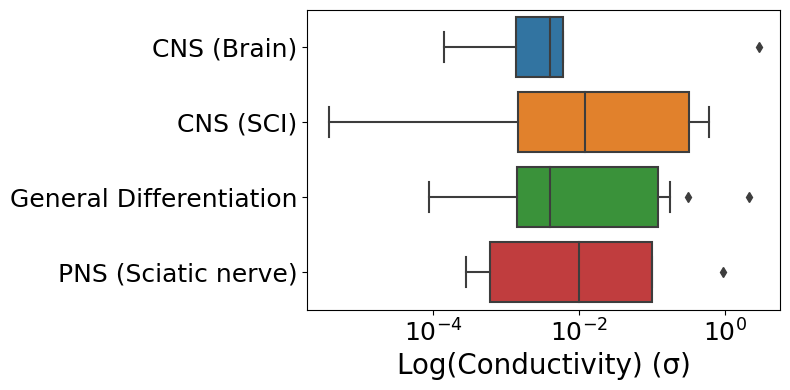

In [417]:
# Fig 8-D (Continued : graphing)

# Melting the DataFrame to convert it from wide to long format
melted_df = wdf_20_b.reset_index(drop=True).melt(var_name='Tissue Model', value_name='Value')

# Creating the boxplot 
plt.figure(figsize=(8, 4))  
sns.boxplot(x='Value', y='Tissue Model', data=melted_df, width=0.8)  
plt.xscale('log')

# Adding labels and title with padding
plt.xlabel('Log(Conductivity) (σ)', fontsize=20)  
plt.ylabel('', fontsize=20)  
plt.tick_params(axis='both', labelsize=18)  
plt.subplots_adjust(left=0.15)
plt.tight_layout()
#plt.savefig('Con.png')

plt.show()




In [425]:
# Fig 9-A

wdf_21 = df.iloc[1:,].loc[:,['diff_condition']]


# Splitting the values in the column by commas and expanding into separate rows
wdf_21_a = wdf_21['diff_condition'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_21_b = pd.DataFrame(wdf_21_a, columns=['diff_condition'])
wdf_21_b['diff_condition'] = wdf_21_b['diff_condition'].str.replace(r'\s+', '', regex=True).str.upper()

# The Venn diagram was made using the counts below
wdf_21_b.diff_condition.value_counts()

diff_condition
C            38
C+E          26
C+N          26
C+N+E         9
INVIVO(C)     1
C+N/C+N+E     1
Name: count, dtype: int64

In [820]:
# Fig 9-B (upper graph)


# Splitting the values in the column by commas and expanding into separate rows
wdf_22 = df.iloc[1:,].loc[:,['Neurotrophic_factor']]
wdf_22_a = wdf_22['Neurotrophic_factor'].str.replace('Mixed (', '', regex=False).str.split(',', expand=True).stack().reset_index(drop=True)
wdf_22_b = pd.DataFrame(wdf_22_a, columns=['Neurotrophic_factor'])
wdf_22_b['Neurotrophic_factor'] = wdf_22_b['Neurotrophic_factor'].str.strip().str.upper()

# Calculating the vounts
print(wdf_22_b[wdf_22_b.Neurotrophic_factor.str.contains('NGF')].value_counts()/ len(wdf_22.dropna()))
print('_____________')
print(wdf_22_b[wdf_22_b.Neurotrophic_factor.str.contains('RA')].value_counts()/ len(wdf_22.dropna()))
print('_____________')
print(wdf_22_b[wdf_22_b.Neurotrophic_factor.str.contains('BFGF')].value_counts()/ len(wdf_22.dropna()))
print('_____________')
print(wdf_22_b[wdf_22_b.Neurotrophic_factor.str.contains('BDNF')].value_counts()/ len(wdf_22.dropna()))


Neurotrophic_factor
NGF                    0.314286
Name: count, dtype: float64
_____________
Neurotrophic_factor
RA                     0.200000
RETINOIC ACID (RA)     0.057143
Name: count, dtype: float64
_____________
Neurotrophic_factor                  
BFGF                                     0.142857
BASIC FIBROBLAST GROWTH FACTOR (BFGF)    0.028571
Name: count, dtype: float64
_____________
Neurotrophic_factor
BDNF                   0.085714
Name: count, dtype: float64


In [458]:
# Fig 9-B (lower graph)
wdf_23 = df.iloc[1:,].loc[:,['Elec_stimulation_type']]

# The percentages below were used to create the graph in R 
wdf_23.Elec_stimulation_type.value_counts() / len(wdf_23.dropna()) * 100


Elec_stimulation_type
Wireless electrical stimulation (magnetic)      36.111111
DC                                              33.333333
AC                                              11.111111
Wireless electrical stimulation (optical)        8.333333
Wireless electrical stimulation (ultrasound)     5.555556
DC (pulsed)                                      2.777778
AC (Biphasic)                                    2.777778
Name: count, dtype: float64

In [492]:
# Fig 9-C1 (data cleaning)
wdf_24 = df_1.iloc[1:,].loc[:,['Neurotrophic_factor','NF_days']].dropna(subset='NF_days')

# Dropping 'Not reported' values
wdf_24 = wdf_24.drop([27,38,40,59],axis =0)

#rearranging data for graphing
wdf_24_a = wdf_24.pivot_table(index=wdf_24.index, columns='Neurotrophic_factor', values='NF_days', aggfunc='first')
wdf_24_a['All'] = wdf_24_a.apply(lambda row: row.sum(), axis=1)
wdf_24_a

Neurotrophic_factor,BDNF,"BDNF, GDNF",NGF,NeuroCult,Neurobasal A medium,Not reported,RA,VEGF,bFGF,All
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14
9,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,6
10,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,14
13,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4
15,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,7
16,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,7
21,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,10
22,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,7
23,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,21
24,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3


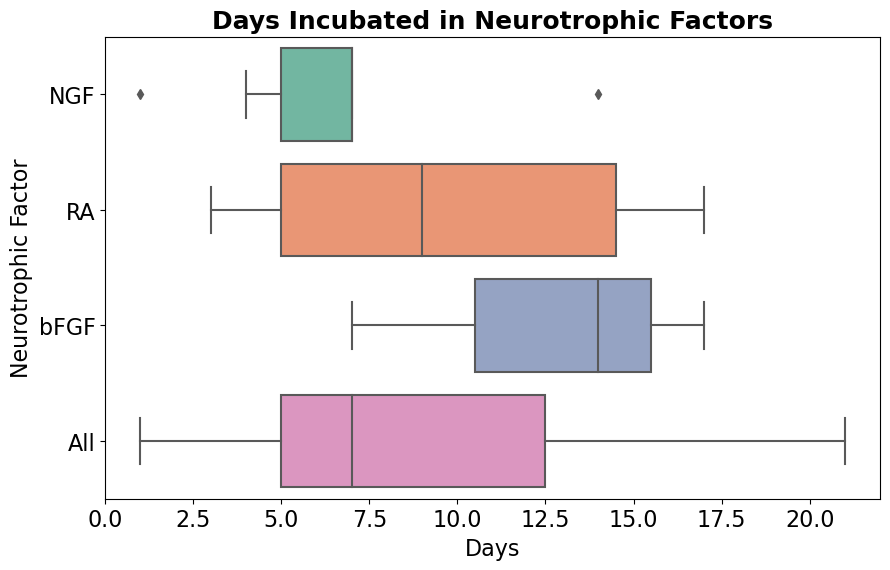

In [823]:
# Fig 9-C1 (Continued: data graphing)

wdf_melted = wdf_24_a.melt(value_vars=['NGF', 'RA', 'bFGF', 'All'], 
                           var_name='Neurotrophic Factor', 
                           value_name='Days')

# Creating the horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Days', y='Neurotrophic Factor', data=wdf_melted, 
            order=['NGF', 'RA', 'bFGF', 'All'], palette='Set2')

plt.title('Days Incubated in Neurotrophic Factors', fontsize=18, fontweight='bold')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Neurotrophic Factor', fontsize=16)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)
plt.grid(False) 

plt.savefig('neurotrophic_factors_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

In [505]:
# Fig 9-C2 ( data cleaning)

wdf_25 = df_1.iloc[1:,].loc[:,['Neurotrophic_factor','NF_concentration']].dropna(subset='NF_concentration')

# rearranging for graphing
wdf_25.reset_index(drop=True, inplace=True)
wdf_25_a = wdf_25.pivot(columns='Neurotrophic_factor', values='NF_concentration')
wdf_25_b = wdf_25_a[['RA', 'NGF', 'bFGF']].copy()
# dropping extreme outliers
wdf_25_b = wdf_25_b.drop([8,12,26,33])

# renaming column names

wdf_25_b.columns = wdf_25_b.columns.str.strip()

if 'RA' in wdf_25_b.columns:
    wdf_25_b['RA'] = wdf_25_b['RA'].str.replace('uM', '', regex=False).astype(float)
    wdf_25_b.rename(columns={
        'RA': 'RA (uM)',
        'NGF': 'NGF (ng/mL)',
        'bFGF': 'bFGF (ng/mL)'
    }, inplace=True)
else:
    print("Column 'RA' not found in the DataFrame.")

wdf_25_b.head(10)

Neurotrophic_factor,RA (uM),NGF (ng/mL),bFGF (ng/mL)
0,NaN,NaN,20
1,1.0,NaN,NaN
2,NaN,50,NaN
3,NaN,50,NaN
4,NaN,100,NaN
5,NaN,100,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
9,NaN,NaN,NaN
10,1.0,NaN,NaN


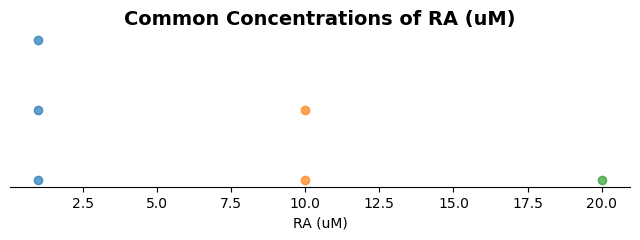

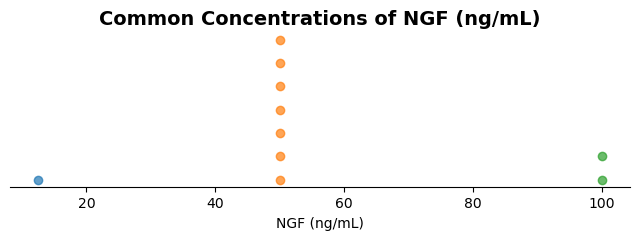

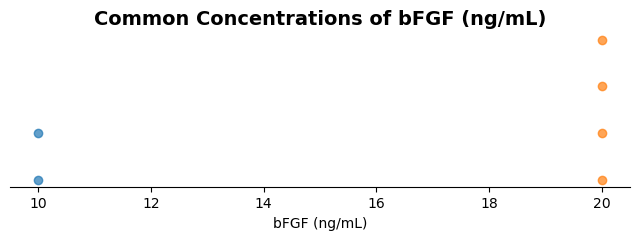

In [506]:
# Fig 9-C2 ( Continued : Visualization)

columns = ['RA (uM)', 'NGF (ng/mL)', 'bFGF (ng/mL)']

# Plotting each value with the corresponding number of occurrences
for column in columns:
    
    plt.figure(figsize=(8, 2))
    values = wdf_25_b[column].dropna()
    unique_values, counts = np.unique(values, return_counts=True)

    for val, count in zip(unique_values, counts):
        plt.scatter([val] * count, range(1, count + 1), alpha=0.7)
    plt.yticks([])  
    plt.xlabel(column)
    plt.title(f'Common Concentrations of {column}', fontsize=14, fontweight='bold')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.grid(False)
    
    plt.show()

In [518]:
# Fig 9-D1 
wdf_26 = df.iloc[1:,].loc[:,['DC_Elec_field_mv/cm','Elec_stimu_hours','Elec_stimu_days']].dropna(subset='DC_Elec_field_mv/cm'	)
#dropping rows with insufficient data
wdf_26 = wdf_26.dropna(subset='DC_Elec_field_mv/cm').drop([9,35,28],axis= 0).reset_index().drop(columns= 'index')

# dataframe below was used to make the graph in Canva.com
wdf_26

,DC_Elec_field_mv/cm,Elec_stimu_hours,Elec_stimu_days
0,1000,14,14
1,100,28,7
2,2000,0.6,7
3,10,0.6,7
4,100,4,4
5,2000,7,7
6,100,2.3,7
7,100,2.5,5
8,200,1.5,3
9,100,2.3,7


In [529]:
# Fig 9-D2
wdf_27= df.iloc[1:,].loc[:,['Mag_field_mT','Mag_freq_Hz','Elec_stimu_hours','Elec_stimu_days']].dropna(subset='Mag_field_mT')
#dropping rows with insufficient data
wdf_27= wdf_27.drop([1,53,71],axis=0).reset_index().drop(columns= 'index')
# dataframe below was used to make the graph in Canva.com
wdf_27

,Mag_field_mT,Mag_freq_Hz,Elec_stimu_hours,Elec_stimu_days
0,15,100,1.25,5
1,1,50,24,7
2,3,2,1,3
3,7.7,Static,72,3
4,100,1,14,7
5,50,Static,336,14
6,200,Static,120,5
7,13,60,3.5,7
8,50,1053,10,10


In [825]:
# Fig 10-A (Pie chart core)

wdf_28 = df.iloc[1:,].loc[:,['Diff_asess_method']].dropna(subset='Diff_asess_method')

wdf_28_a = wdf_28['Diff_asess_method'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_28_b = pd.DataFrame(wdf_28_a, columns=['Diff_asess_method'])
wdf_28_b['Diff_asess_method'] = wdf_28_b['Diff_asess_method'].str.strip().str.title()

# counts below were used to make the core of the Pie chart
print(wdf_28_b[wdf_28_b.Diff_asess_method.str.contains('Protein Marker')].value_counts())
print('________________')
print(wdf_28_b[wdf_28_b.Diff_asess_method.str.contains('Morphology')].value_counts())
print('________________')
print(wdf_28_b[wdf_28_b.Diff_asess_method.str.contains('Gene Marker')].value_counts())
print('________________')
print(wdf_28_b[wdf_28_b.Diff_asess_method.str.contains('Electrophysiologica')].value_counts())


Diff_asess_method                       
Neural Protein Marker Analysis              68
In Vivo(Neural Protein Marker Analysis)      8
In Vivo (Neural Protein Marker Analysis)     6
In Vivo(Neural Protein Marker Analysis )     3
In Vivo(Neural Protein Marker Analysis       2
Name: count, dtype: int64
________________
Diff_asess_method
Morphology           40
Name: count, dtype: int64
________________
Diff_asess_method                    
Neural Gene Marker Analysis              37
Neural Gene Marker Analysis)              2
In Vivo (Neural Gene Marker Analysis)     1
Name: count, dtype: int64
________________
Diff_asess_method              
Electrophysiological Assessment    2
Name: count, dtype: int64


In [824]:
# Fig 10-A (Pie chart periphery)
wdf_29_a = df.iloc[1:,].loc[:,['Diff_morph']].dropna()
wdf_29_b = df.iloc[1:,].loc[:,['Genetic_marker_method']].dropna()
wdf_29_c = df.iloc[1:,].loc[:,['Protein_marker_method']].dropna()

# Counts obtained from below were used to make the periphery of the pie chart
print(wdf_29_a.value_counts())
print('________________')
print(wdf_29_b.value_counts())
print('________________')
print(wdf_29_c.value_counts())

Diff_morph                                           
Neurite Growth/Length                                    35
Other (myelination), Neurite Growth/Length                3
Other (myelination)                                       1
Synapsis formation/connectivity,Neurite Growth/Length     1
`                                                         1
Name: count, dtype: int64
________________
Genetic_marker_method
PCR                      38
Name: count, dtype: int64
________________
Protein_marker_method       
Immunostaining                  53
Immunostaining, Western blot     4
Western blot                     4
ELISA                            3
Immunostaining,CLSM              1
Immunostaining,western blot      1
In vivo (Immunostaining)         1
Name: count, dtype: int64


In [572]:
# Fig 10-B (Upper graph)
wdf_31 = df.iloc[1:,].loc[:,['genetic_marker_group']].dropna()
wdf_30_a = wdf_30['genetic_marker_group'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_30_b = pd.DataFrame(wdf_30_a, columns=['genetic_marker_group'])
wdf_30_b['genetic_marker_group'] = wdf_30_b['genetic_marker_group'].str.strip().str.title()

# the dataframe below was defined in R for graphing
wdf_30_b.value_counts() 

genetic_marker_group       
Neuronal Cells And Function    36
Astrocytes                     25
Nerual Stem Cells              18
Oligodendrocytes                8
Neurotrophic Factors            4
Name: count, dtype: int64

In [573]:
# Fig 10-B (lower graph)
wdf_31 = df.iloc[1:,].loc[:,['Protein_marker_group']].dropna()
wdf_31_a = wdf_31['Protein_marker_group'].str.split(',', expand=True).stack().reset_index(drop=True)
wdf_31_b = pd.DataFrame(wdf_31_a, columns=['Protein_marker_group'])
wdf_31_b['Protein_marker_group'] = wdf_31_b['Protein_marker_group'].str.strip().str.title()

# the dataframe below was defined in R for graphing
wdf_31_b.value_counts() 

Protein_marker_group       
Neuronal Cells And Function    63
Astrocytes                     28
Neural Stem Cells               8
Oligodendrocytes                8
Nerual Stem Cells               6
Neurotrophic Factors            2
Astrocyte                       1
Neurotrophic Factor             1
Name: count, dtype: int64

In [595]:
# Fig 10-C1 

# The cleaned data from "Clean" sheet is imported 
wdf_32 = df_1.iloc[1:,1:6]

# Exporting for graphing in R
wdf_32.to_csv('wdf_32.csv')

wdf_32.sample(10)

,Neural_Stem_Cells,Neuronal_Cells_and_Function,Oligodendrocytes,Astrocytes,Neurotrophic_Factors
32,NaN,MAP2,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
27,Nestin,Tuj1,NaN,NaN,NaN
82,SOX2,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
64,NaN,Other,NaN,NaN,NaN
17,Nestin,MAP2,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN


In [596]:
# Fig 10-C2 

# The cleaned data from "Clean" sheet is imported 
wdf_33 = df_1.iloc[1:,7:12]
# Exporting for graphing 
wdf_33.to_csv('wdf_33.csv')

wdf_33

,Neural_Stem_Cells_P,Neuronal_Cells_and_Function_P,Oligodendrocytes_P,Astrocytes_P,Neurotrophic_Factors_P
1,NaN,Tuj1,NaN,NaN,NaN
2,Nestin,Tuj1,MBP,GFAP,NaN
3,NaN,Tuj1,NaN,NaN,NaN
4,Sox2,Tuj1,NaN,NaN,NaN
5,Sox2,MAP2,NaN,GFAP,NaN
...,...,...,...,...,...
96,NaN,Tuj1,NaN,NaN,NaN
97,NaN,NF,NaN,NaN,NaN
98,NaN,Other,NaN,NaN,NaN
99,NaN,NeuN,NaN,NaN,NaN


In [650]:
# Fig 11-A

wdf_34 =df_1.iloc[1:,].loc[:,['in_vivo_protein_mark']].dropna()

# Splitting the values in the column by commas and expanding into separate rows
wdf_34_a = wdf_34['in_vivo_protein_mark'].str.split(',', expand=True)
wdf_34_b = wdf_34_a.melt(value_name='Protein Markers').dropna()
wdf_34_b['Protein Markers'] = wdf_34_b['Protein Markers'].str.strip().str.upper().reset_index().drop(columns='index')
wdf_34_b = wdf_34_b.drop(columns='variable').dropna()
wdf_34_b.columns= ['Protein_Markers']
wdf_34_c = pd.DataFrame(wdf_34_b.Protein_Markers.value_counts()[:16]).reset_index()

wdf_34_c = wdf_34_c[wdf_34_c.Protein_Markers != 'IMMUNE/INFLAMMATION MARKERS']

#Exporting for graphing in R
wdf_34_c.to_csv('wdf_34_c.csv')

In [839]:
# Fig 11-B (core of the pie chart)

wdf_35= df.iloc[1:,].loc[:,['In_vivo_asess_method']].dropna()
wdf_35_a = wdf_35['In_vivo_asess_method'].str.split(',', expand=True)
wdf_35_b = wdf_35_a.melt(value_name='In_vivo_asess_method').dropna()
wdf_35_b['In_vivo_asess_method'] = wdf_35_b['In_vivo_asess_method'].str.strip().str.upper().reset_index().drop(columns='index')
wdf_35_b['In_vivo_asess_method'] = wdf_35_b.In_vivo_asess_method[wdf_35_b.In_vivo_asess_method != ""]
wdf_35_b.dropna().In_vivo_asess_method.value_counts() /len(wdf_35_b.dropna()) * 100


In_vivo_asess_method
HISTOLOGICAL ANALYSIS                35.625
PROTEIN MARKER ANALYSIS              30.000
BEHAVIORAL TESTING                   25.625
ELECTROPHYSIOLOGICAL MEASUREMENTS     8.125
GENE MARKER ANALYSIS                  0.625
Name: count, dtype: float64

In [720]:
# Fig 11-B (Continued: periphery of the chart)

wdf_36 = df.iloc[1:,].loc[:,['in_vivo_behavioral']].dropna()
wdf_36_a = wdf_36['in_vivo_behavioral'].str.split(',', expand=True)
wdf_36_b = wdf_36_a.melt(value_name='in_vivo_behavioral').dropna()
wdf_36_b['in_vivo_behavioral'] = wdf_36_b['in_vivo_behavioral'].str.strip().str.upper().reset_index().drop(columns='index')
wdf_36_b = wdf_36_b.dropna() 

print('Motor function periphery values')
print('__________________________________')
print('Motor function percentage')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('MOTOR', na=False)]) / len(wdf_36_b))
print('Motor function BBB')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('BBB', na=False)]) / len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('MOTOR FUNCTION', na=False)]))
print('Motor function SFI')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('SFI', na=False)]) / len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('MOTOR FUNCTION', na=False)]))
print('Motor function Walking track')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('WALKING TRACK', na=False)]) / len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('MOTOR FUNCTION', na=False)]))
print('Motor function fooprint')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('FOOT', na=False)]) / len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('MOTOR FUNCTION', na=False)]))
print('Sensory function percentage')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('SENSORY', na=False)]) / len(wdf_36_b))
print('Cognative/Emotional function percentage')
print(len(wdf_36_b[wdf_36_b['in_vivo_behavioral'].str.contains('COGNITIVE|OTHER', na=False)]) / len(wdf_36_b))

wdf_37 = df_1.iloc[1:,].loc[:,['elec_methods']].dropna()
wdf_37.value_counts()/ len(wdf_37)

Motor function periphery values
__________________________________
Motor function percentage
0.8913043478260869
Motor function BBB
0.4634146341463415
Motor function SFI
0.14634146341463414
Motor function Walking track
0.2682926829268293
Motor function fooprint
0.12195121951219512
Sensory function percentage
0.06521739130434782
Cognative/Emotional function percentage
0.043478260869565216


elec_methods                      
CMAP                                  0.315789
MEPs                                  0.157895
Motor and sensory-evoked potential    0.105263
CAP                                   0.052632
ICP                                   0.052632
LFP                                   0.052632
MAP                                   0.052632
NCV                                   0.052632
SCEP                                  0.052632
SEP                                   0.052632
Single-Unit recording                 0.052632
Name: count, dtype: float64